In [151]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, r_regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.dpi'] = 600


dataset = fetch_california_housing(data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)
X = pd.DataFrame(dataset.data, columns=dataset["feature_names"]) #split dataset into X and target variable
y = pd.DataFrame(dataset.target, columns=dataset["target_names"])
data = pd.concat([X, y], axis=1)

X.describe() #describe X briefly

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [152]:
X.isna().sum() #na check

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [158]:
X_SS_transform = StandardScaler().fit_transform(X) #feature normalization
X_SS_transform = pd.DataFrame(X_SS_transform, columns=X.columns)

In [1]:
fig, ax = plt.subplots(2, 2, constrained_layout=True)

from sklearn.feature_selection import f_regression, r_regression, mutual_info_regression
best_features = SelectKBest(score_func=f_regression, k='all') #find k features that fit to target value with f-regression
fit = best_features.fit(X, y) # data fitting
fit_SS = best_features.fit(X_SS_transform, y)
df_scores = pd.DataFrame(fit.scores_)
df_scores_SS = pd.DataFrame(fit_SS.scores_)
df_columns = pd.DataFrame(data.columns[:-1])
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores_SS = pd.concat([df_columns, df_scores_SS], axis=1)
feature_scores.columns = ['Features', 'Score']
feature_scores_SS.columns = ['Features', 'Score']
feature_scores.index = X.columns
feature_scores_SS.index = X.columns
ax[0][0] = feature_scores.nlargest(10, 'Score').plot(kind='barh') #find 10 largest features and show
ax[0][1] = feature_scores_SS.nlargest(10, 'Score').plot(kind='barh')


NameError: name 'SelectKBest' is not defined

/opt/homebrew/Caskroom/miniforge/base/envs/RL_Sutton/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/Caskroom/miniforge/base/envs/RL_Sutton/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


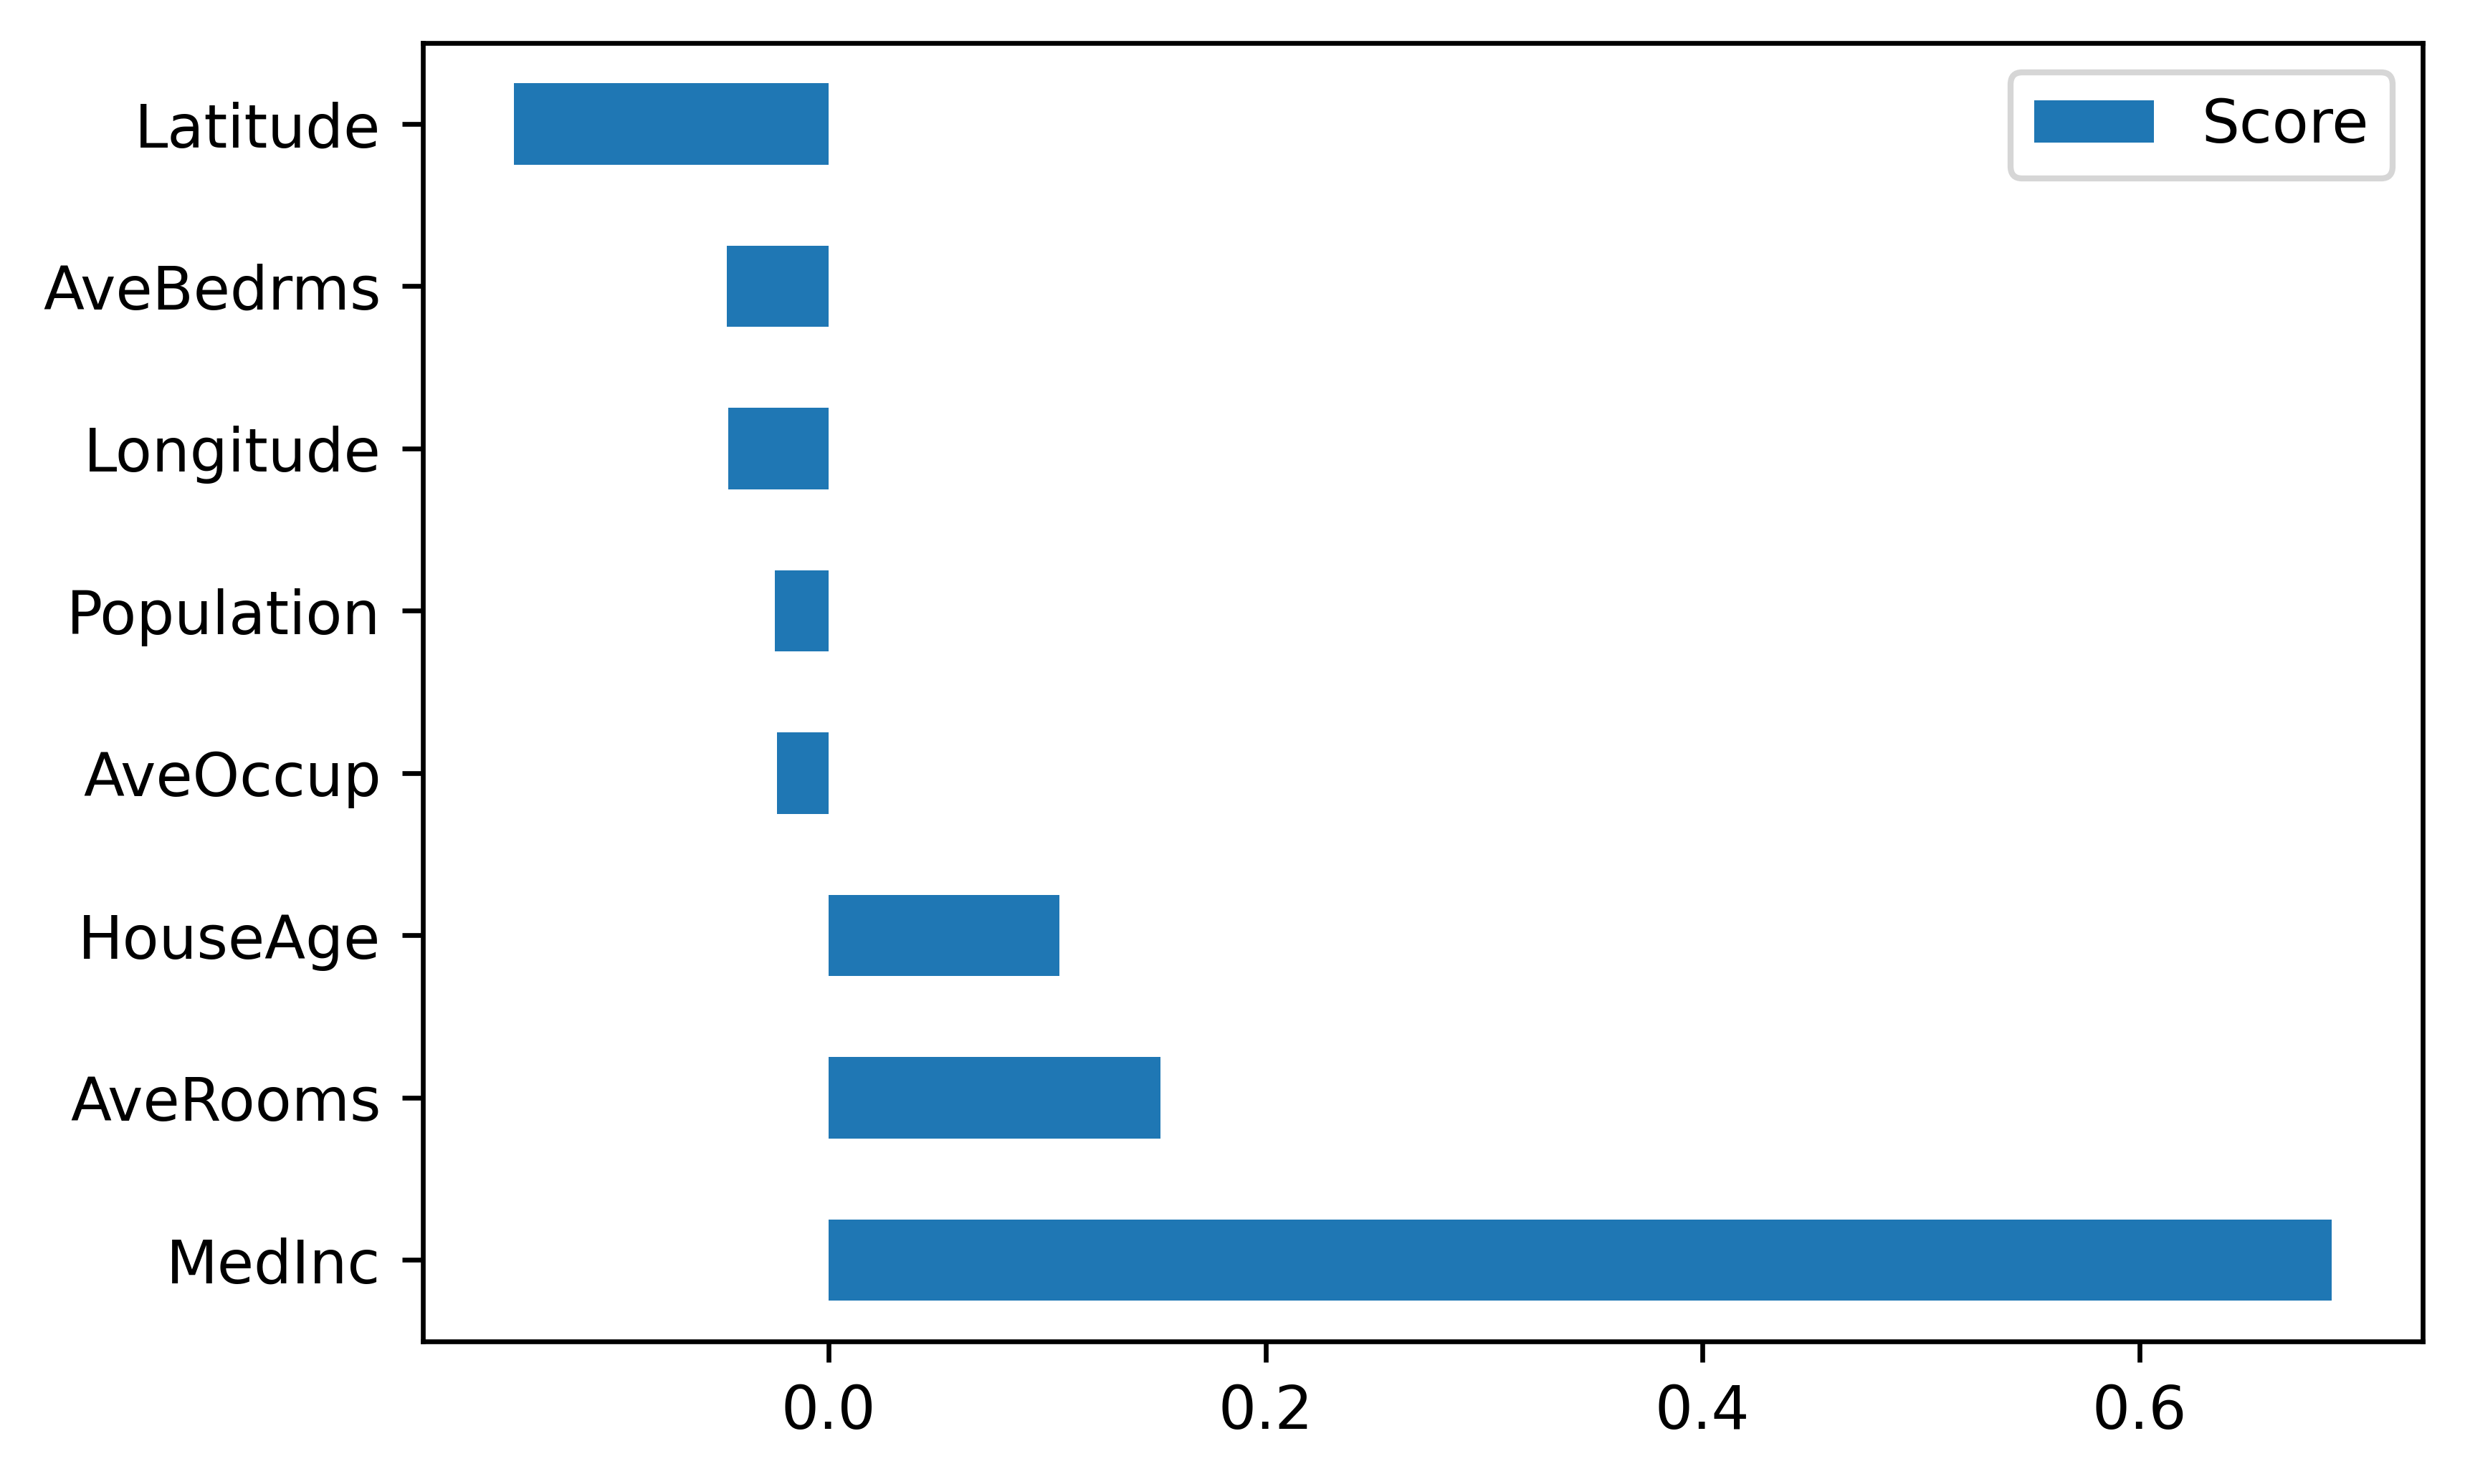

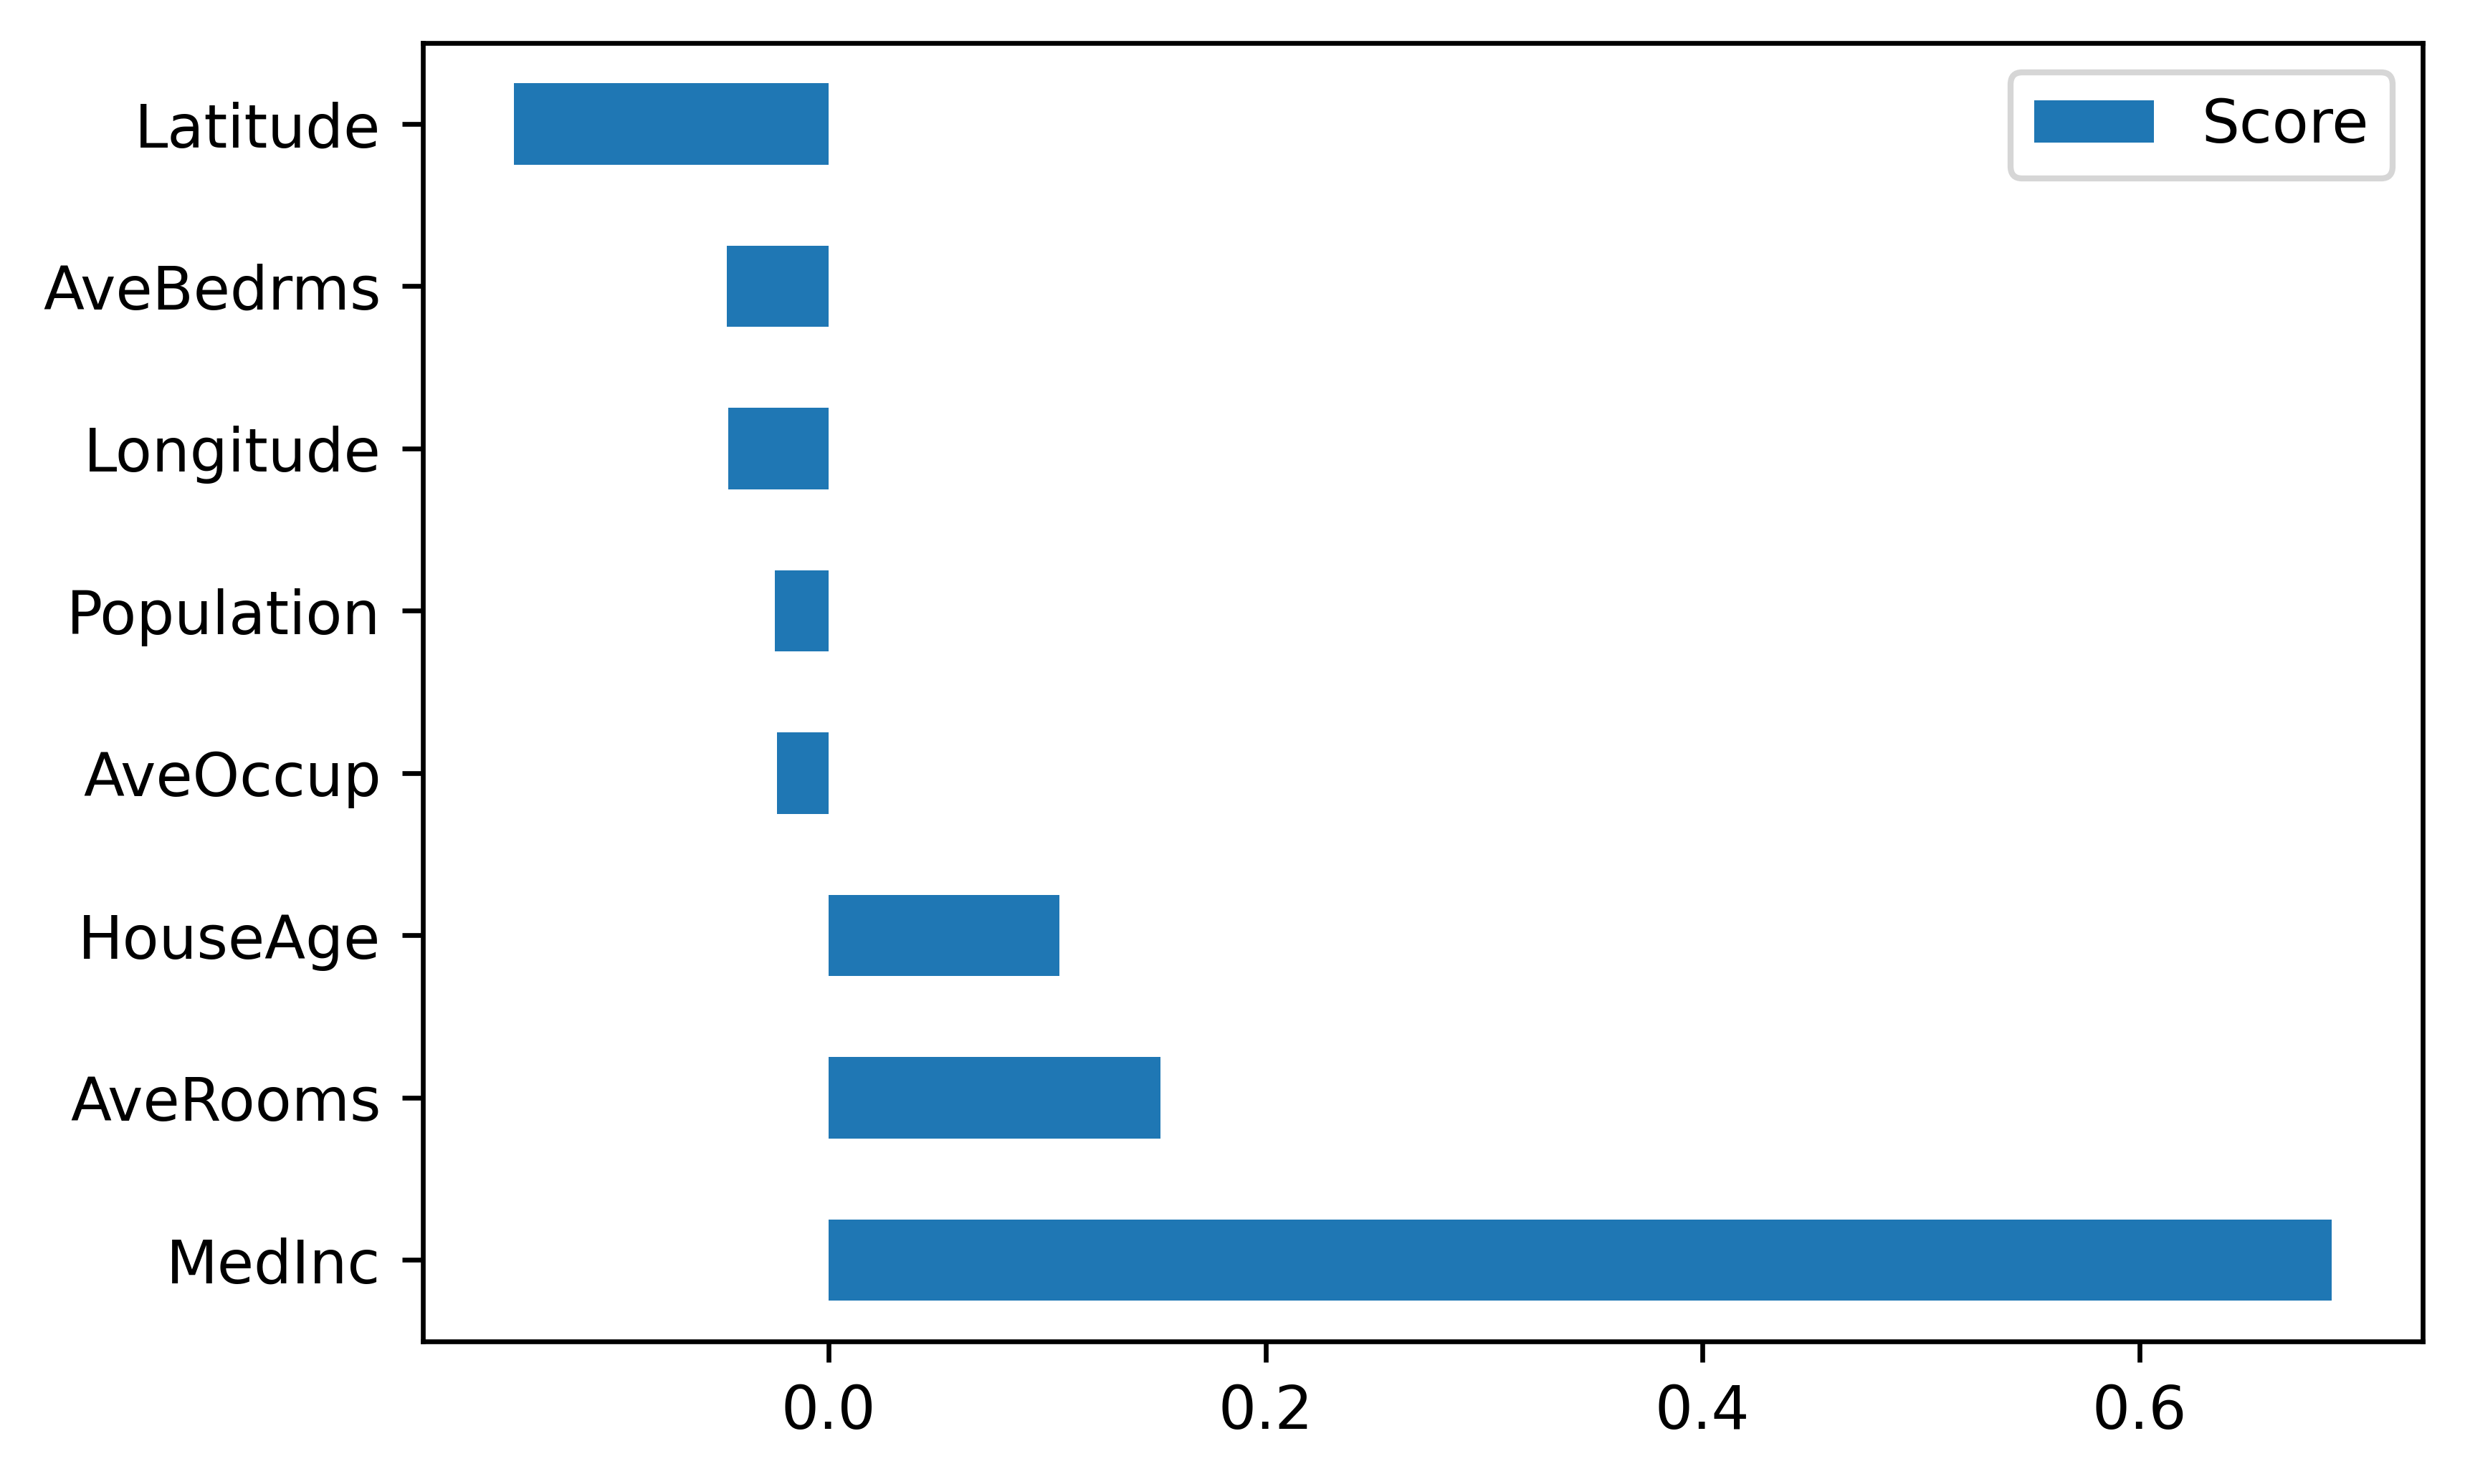

In [167]:

best_features = SelectKBest(score_func=r_regression, k='all') #find k features that fit to target value with f-regression
fit = best_features.fit(X, y) # data fitting
fit_SS = best_features.fit(X_SS_transform, y)
df_scores = pd.DataFrame(fit.scores_)
df_scores_SS = pd.DataFrame(fit_SS.scores_)
df_columns = pd.DataFrame(data.columns[:-1])
feature_scores_r = pd.concat([df_columns, df_scores], axis=1)
feature_scores_SS_r = pd.concat([df_columns, df_scores_SS], axis=1)
feature_scores_r.columns = ['Features', 'Score']
feature_scores_SS_r.columns = ['Features', 'Score']

feature_scores_r.index = X.columns
feature_scores_SS_r.index = X.columns

ax[1][0] = feature_scores_r.nlargest(10, 'Score').plot(kind='barh') #find 10 largest features and show
ax[1][1] = feature_scores_SS_r.nlargest(10, 'Score').plot(kind='barh')

In [164]:
feature_scores_r

,Features,Score
0,MedInc,0.688075
1,HouseAge,0.105623
2,AveRooms,0.151948
3,AveBedrms,-0.046701
4,Population,-0.024650
5,AveOccup,-0.023737
6,Latitude,-0.144160
7,Longitude,-0.045967


In [163]:
feature_scores_SS_r


,Features,Score
0,MedInc,0.688075
1,HouseAge,0.105623
2,AveRooms,0.151948
3,AveBedrms,-0.046701
4,Population,-0.024650
5,AveOccup,-0.023737
6,Latitude,-0.144160
7,Longitude,-0.045967


In [161]:
corr_mat = data.corr() # find correlation efficient
top_corr_features = corr_mat.index
plt.figure(figsize=(20, 20))
g=sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn") #plot using heatmap



In [162]:
transformed_data = pd.concat([X_SS_transform, y])
corr_mat = transformed_data.corr() # find correlation efficient
top_corr_features = corr_mat.index
plt.figure(figsize=(20, 20))
g=sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn") #plot using heatmap